In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station
measurement

sqlalchemy.ext.automap.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).scalar()
most_recent

'2017-08-23'

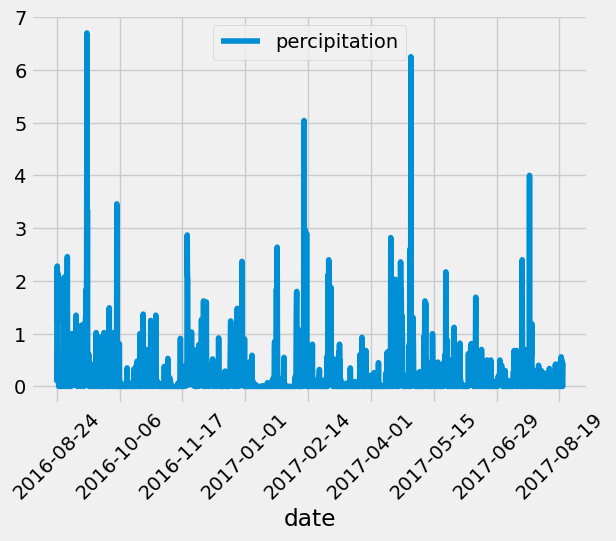

In [41]:


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = most_recent[0]
most_recent_date = dt.datetime.strptime(str(most_recent), '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp) \
    .filter(measurement.date >= one_year) \
    .order_by(measurement.date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query, columns =["date", "percipitation"]).sort_values("date",ascending=True).dropna()
df.set_index(df["date"], inplace = True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 45)
plt.show()




In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_results = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

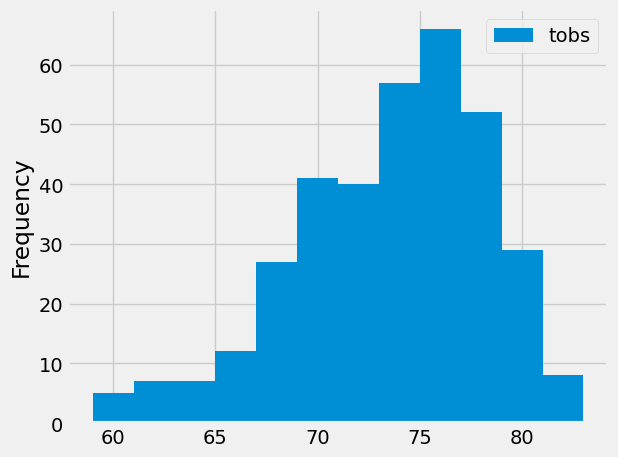

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_result = session.query(measurement.tobs).filter(measurement.station == "USC00519281").\
    filter(measurement.date >= one_year).all()
station_df = pd.DataFrame(station_result, columns = ["tobs"])
station_df.plot.hist(bins = 12)
plt.tight_layout()

# Close Session

In [16]:
# Close Session
session.close()